In [14]:
import matplotlib.pyplot as plt
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election, metrics)
from gerrychain.proposals import recom
from functools import partial
import pandas
import networkx
import numpy as np
import geopandas
import shapely
from scipy.stats.stats import pearsonr
import mapper

In [15]:
n_data = 20 #number of data point
distance_matrix = np.random.rand(n_data,n_data) #pairwise distances as a matrix
filter_values = np.random.rand(n_data) #filtration values of data
n_interval = 5 #number of intervals in cover
cluster_parameter = 0.15 #tunable

In [16]:
straightened_distance_matrix = []
for i in range(0, n_data):
    for j in range(i+1, n_data):
        straightened_distance_matrix.append(max(0,distance_matrix[i][j]))

Upper triangular distance matrix: 


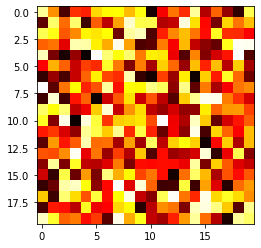

In [17]:
print("Distance matrix: ")
plt.imshow(distance_matrix, cmap="hot")
plt.show()

In [18]:
covers = mapper.cover.cube_cover_primitive(intervals=n_interval)

Number of observations: 20.
Number of CPU cores present: 4
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Start Mapper thread.
Mapper: Filter range in dimension 0: [0.03, 0.98]
Mapper: Cover: Hypercube cover. Intervals: (5,). Overlap: (50.0,)
Mapper: Clustering: Single linkage clustering
Mapper: Cutoff: First gap of relative width 0.15
Level: (0,)
Level: (1,)
Level: (2,)
Level: (3,)
Level: (4,)Filter level (0,) has 7 points.

Filter level (1,) has 7 points.Filter level (2,) has 3 points.
Filter level (3,) has 8 points.

Filter level (4,) has 10 points.
There are 13 nodes.
Generate the simplicial complex.
Collect simplices of dimension 1:
There are 9 simplices of dimension 1.
Collect simplices of dimension 2:
There are 0 simplices of dimension 2.
Dimension: 1


((-305.76138280322994,
  42.82373667503299,
  -5.559813748905644,
  245.84367814986982,
  0.28766738322983026),
 array([ 0,  4,  1,  2,  3,  6, 11, 12,  5,  7,  9,  8, 10]),
 array([[  -5.55981375,  119.59171406],
        [ -89.12390102,  123.34587414],
        [-162.23456789,  163.69952194],
        [-111.15047313,   42.82373668],
        [-102.8819992 ,  205.78995661],
        [ -33.69342351,  185.8465548 ],
        [ -39.76099615,   55.93603971],
        [-165.99911301,   90.87305433],
        [ -31.76739644,  243.64078584],
        [-164.1129257 ,  228.06628799],
        [-236.33511004,  225.87535448],
        [-305.7613828 ,  245.84367815],
        [-235.82011699,   42.82373668]]),
 <matplotlib.collections.CircleCollection at 0x124c26ac8>)

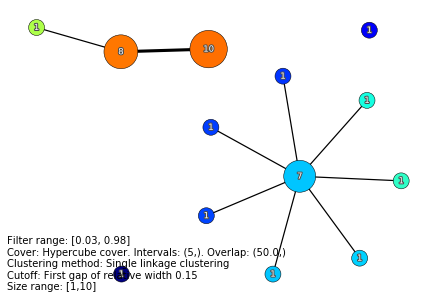

In [21]:
maps = mapper.mapper(np.array(straightened_distance_matrix), filter_values, covers, cutoff=mapper.cutoff.first_gap(cluster_parameter))
mapper.draw_mapper_output.draw_2D(maps, node_color_scheme=None)